In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa 
import librosa.display
import IPython.display as ipd

%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('./src/otXception/inference.py'))
sys.path.insert(0, module_path)

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [2]:
def create_spec(y, sr, w, i, t): 
    """
    Creates and saves a spectrogram of the loaded audio file.
    """
    D = librosa.stft(y)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    fig, ax = plt.subplots(figsize=(10,5))
    img = librosa.display.specshow(S_db, 
                                x_axis='time',
                                y_axis='log',
                                ax = ax)
    # Colorbar removed for consistency 
    # fig.colorbar(img, ax=ax, format=f'%0.2f')
    img_name = './Spectrograms/' + t + '/' + w + '/sample' + str(i+1) + '.png'
    plt.savefig(img_name)
    plt.close

In [3]:
# t here is 'testing' or 'training', specifies folder
def produce_specs(t):
    """
    Loads audio files from training/testing trimmed .wav folder and produces corresponding spectrogram .png files in training/testing Spectrogram folder
    """
    # w here is for weight, specifies folder
    for w in ['20kg', '40kg']:
        folder_name = './TrimSounds/' + t + '/' + w + '/*.wav'
        audio_files = glob(folder_name)
        for i in range(len(audio_files)):
            y, sr = librosa.load(audio_files[i])
            create_spec(y, sr, w, i, t)

In [4]:
def main():
    done = False
    while done == False:
        print("Select your desired action:")
        print("[1]: Produce training spectrogram from trimmed .wav files")
        print("[2]: Use training spectrogram to train the machine")
        print("[3]: Produce testing spectrogram from trimmed .wav files")
        print("[4]: Use testing spectrogram to test the machine")
        print("[5]: Quit")
        usr_input = input()
        if usr_input == '1':
            print("Producing training spectrogram...")
            produce_specs('Training')
            print("Training spectrogram produced.")
        elif usr_input == '2':
            print("Training the machine...")
            print("Machine trained.")
        elif usr_input == '3':
            print("Producing testing spectrogram...")
            produce_specs('Testing')
            print("Testing spectrogram produced.")
        elif usr_input == '4':
            print("Which weight would you like to test?")
            print("NOTE: The output only references the weight on the bar, so it is not the total weight")

            print("[1] 20kg + bar (40.4kg)")
            print("[2] 40kg + bar (60.4kg)")
            test_weight_input = input()
            if test_weight_input == '1':
                print("To select a sample to test, please select a number between 1 and 20.")
                test_number_input = input()
                if test_number_input.isdigit():
                    if int(test_number_input) > 0 and int(test_number_input) < 20:
                        print("Testing 20kg + bar sample #" + test_number_input)
                        # PUT CODE TO TEST HERE:

                        # os.system("python src/otXception/inference.py src/otXception/output/model_fine_final.h5 classes.txt ./Spectrograms/Testing/20kg/sample" + test_number_input + ".png")

                        # print("Top %d ====================" % (i + 1))
                        # print("Class name: %s" % (class_name))
                        # print("Probability: %.2f%%" % (prob))

                        print("Test complete")
                    else:
                        print(test_number_input + " is not a valid input.")
                        print("Please select a number 1-20.")
                else:
                    print(test_number_input + " is not a valid input.")
                    print("Please select a number 1-20.")
            elif test_weight_input == '2':
                print("To select a sample to test, please select a number between 1 and 20.")
                test_number_input = input()
                if test_number_input.isdigit():
                    if int(test_number_input) > 0 and int(test_number_input) < 20:
                        print("Testing 40kg + bar sample #" + test_number_input)
                        # PUT CODE TO TEST HERE:
                        
                        # os.system("python src/otXception/inference.py src/otXception/output/model_fine_final.h5 classes.txt ./Spectrograms/Testing/40kg/sample" + test_number_input + ".png")
                        print("Test complete")
                    else:
                        print(test_number_input + " is not a valid input.")
                        print("Please select a number 1-20.")
                else:
                    print(test_number_input + " is not a valid input.")
                    print("Please select a number 1-20.")
            else:
                print(test_weight_input + " is not a valid input.")
                print("Please select a number 1-2.")
        elif usr_input == '5':
            done = True
            print("Quitting")
        else:
            print(usr_input + " is not a valid input.")
            print("Please select a number 1-5.")

Select your desired action:
[1]: Produce training spectrogram from trimmed .wav files
[2]: Use training spectrogram to train the machine
[3]: Produce testing spectrogram from trimmed .wav files
[4]: Use testing spectrogram to test the machine
[5]: Quit
Producing training spectrogram...


FileNotFoundError: [Errno 2] No such file or directory: './Spectrogram/Training/20kg/sample1.png'

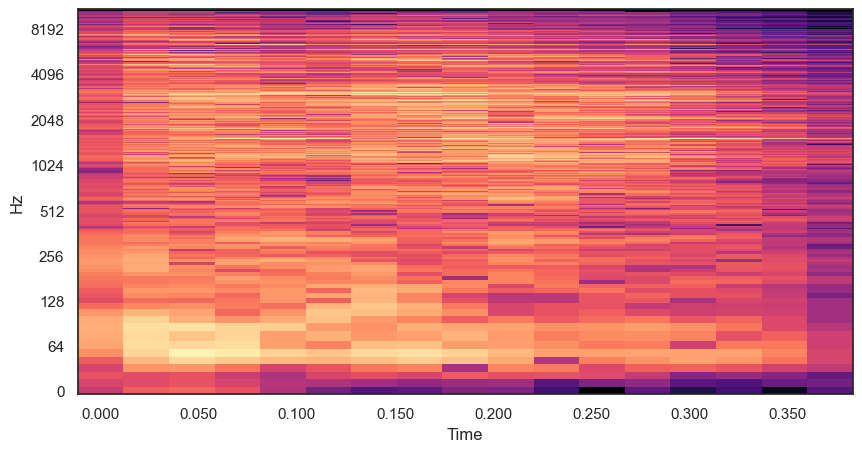

In [5]:
if __name__ == "__main__":
    main()